In [1]:
%pylab inline
import time
from collections import defaultdict
import json
import pandas as pd
import os
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout



import numpy as np
import requests
import json 

from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
'''
Created on Jul 16, 2016

@author: Tania
'''
import json
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import urllib2

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

#TODO: show to hists in one plot (seed+baseline)

#base_dir = os.path.dirname(os.path.dirname(__file__))
base_dir="C:\\Users\\zagovooa\\GitHub\\scientists-analysis-\\"
base_dir="C:\\Users\\zagovooa\\OneDrive\\GESIS 2017\\metrics project\\GitHub\\scientists-analysis-wikipedia\\"
data_dir = os.path.join(base_dir, 'data')
plots_dir = os.path.join(base_dir, 'plots')


baseline_dir = os.path.join(data_dir, 'baseline')
seed_dir = os.path.join(data_dir, 'seed')
neighbors_dir = os.path.join(data_dir, 'neighbors')






def load_simple_json(filename):
    with open(filename, 'r') as f:
        return json.load(f)

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return (d2 - d1).days

def weekly_aggregation(time_list):
    weekly_list = []
    for day in time_list:
        day = day/7
        weekly_list.append(day)
    return weekly_list

def monthly_aggregation(time_list):
    monthly_list = []
    for day in time_list:
        day = day/30
        monthly_list.append(day)
    return monthly_list


def plotting(array, name,color="blue",period="months",text1="90",text2="10"):
    #plt.title("Time lag between the articles creation")
    f = plt.figure(dpi=500,figsize=(5, 3.75))
    plt.xlabel("Time lag (%s)"%period)
    plt.ylabel("Probability")
    plt.hist(array, bins=50, color=color, normed = True,histtype='bar', ec='black')
    plt.ylim(0,0.0025)
    #plt.xlim(np.min(array),np.max(array))
    plt.xlim(-800,780)
    plt.plot([0,0], [0,0.0025],"r--" ,label="Week when the article\nabout scientist\nwas created")
    plt.legend(frameon=False,loc='upper right', bbox_to_anchor=(1.028, 1),handlelength=1.3)
    plt.text(-580, 0.00175, "%s%%\narticles"%(text1),fontdict={"size":13},ha='center')
    plt.text(400, 0.001, "%s%% of\narticles"%(text2),fontdict={"size":13},ha='center')
    plt.tight_layout()
    plt.savefig(plots_dir+name,dpi=500)
    return

# Plot the frequency distribution
def plot_distribution(seed, baseline, name,hist=False,period="months"):
    seed, base_seed = np.histogram(seed, bins=50)
    baseline, base_baseline = np.histogram(baseline, bins=50)
    cumulative_seed = np.cumsum(seed)
    print cumulative_seed
    cumulative_seed = np.float32(cumulative_seed)/np.max(cumulative_seed)
    print cumulative_seed
    cumulative_baseline = np.cumsum(baseline)
    cumulative_baseline = np.float32(cumulative_baseline)/np.max(cumulative_baseline)
    if not hist:
        #plt.title("Time lag between the articles creation")
        f = plt.figure(dpi=500,figsize=(5, 3.75))
        plt.xlabel("Time lag (%s)"%period)
        plt.ylabel("Number of pages created")
        plt.plot(base_seed[:-1], cumulative_seed, c='blue', label = 'Awarded group')
        plt.plot(base_baseline[:-1], cumulative_baseline, c='green', label = 'Non-awarded group')
        plt.plot([0,0], [0,1], "r--" ,label="Week when the article\nabout scientist\nwas created")
        plt.legend(loc='lower right', bbox_to_anchor=(1.028, 0),frameon=False,handlelength=1.3)#
        plt.ylim(0,1)
        plt.xlim(-800,800)
        plt.savefig(plots_dir+name)
    else:
        bins = range(-20, 20)
        #plt.xticks(bins, ["2^%s" % i for i in bins])
        plt.hist(seed, normed = True, label = 'seed data'  )#bins=bins, 
        #plt.hist(baseline, normed = True, bins=bins, label = 'baseline data',  cumulative = True, histtype = 'step')
        plt.legend(loc='upper left')
        plt.show()
        
    return


filename =  os.path.join(data_dir, 'baseline_topic_creation_date.json')    
topic_dict_baseline = load_simple_json(filename)

filename =  os.path.join(base_dir, 'baseline_creation_date.json')    
scientist_dict_baseline = load_simple_json(filename)

filename =  os.path.join(data_dir, 'baseline_neighbors_list_clean_en.json')    
main_dict_baseline = load_simple_json(filename)

filename =  os.path.join(data_dir, 'seed_topic_creation_date.json')    
topic_dict_seed = load_simple_json(filename)

filename =  os.path.join(base_dir, 'seed_creation_date.json')    
scientist_dict_seed = load_simple_json(filename)

filename =  os.path.join(data_dir, 'seed_neighbors_list_clean_en.json')    
main_dict_seed = load_simple_json(filename)


timelag_dict = {}
time_list = []

def get_series(main_dict, scientist_dict, topic_dict):
    time_list = []
    for scientist, topic_list in main_dict.iteritems():     
        #scientist = scientist.encode("utf-8")
        #scientist = urllib2.unquote(scientist).decode("utf-8")
        #scientist = urllib.quote_plus(scientist.encode("utf-8"))
        #print scientist
        if topic_list!=[]:
            scientist_date = scientist_dict.get(scientist).get('Page_created').rstrip().split('T')[0]
            for topic in topic_list:
                topic_date = topic_dict.get(topic).rstrip().split('T')[0]
                time_lag = days_between(scientist_date, topic_date)
                time_list.append(time_lag)
    return time_list

In [3]:
seed_data = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed)
baseline_data = get_series(main_dict_baseline, scientist_dict_baseline, topic_dict_baseline)

seed = weekly_aggregation(seed_data)
baseline = weekly_aggregation(baseline_data)

In [ ]:
#main_dict_baseline

[  10   23   33   39   49   58   66   83  105  131  170  220  273  322  420
  515  619  764  934 1144 1346 1533 1705 1868 2030 2194 2321 2423 2505 2581
 2649 2694 2733 2771 2815 2848 2867 2884 2914 2931 2951 2965 2973 2982 2988
 2991 2993 2994 2994 2996]
[ 0.00333778  0.0076769   0.01101469  0.01301736  0.01635514  0.01935915
  0.02202937  0.02770361  0.03504673  0.04372497  0.05674232  0.07343124
  0.09112149  0.10747664  0.14018692  0.17189586  0.20660882  0.25500667
  0.31174901  0.38184246  0.44926569  0.51168227  0.56909209  0.62349802
  0.6775701   0.73230976  0.77469963  0.80874497  0.83611482  0.86148196
  0.88417888  0.89919895  0.91221631  0.92489988  0.9395861   0.9506008
  0.95694262  0.9626168   0.9726302   0.97830439  0.98497999  0.98965287
  0.9923231   0.99532712  0.99732977  0.99833113  0.99899864  0.99933243
  0.99933243  1.        ]


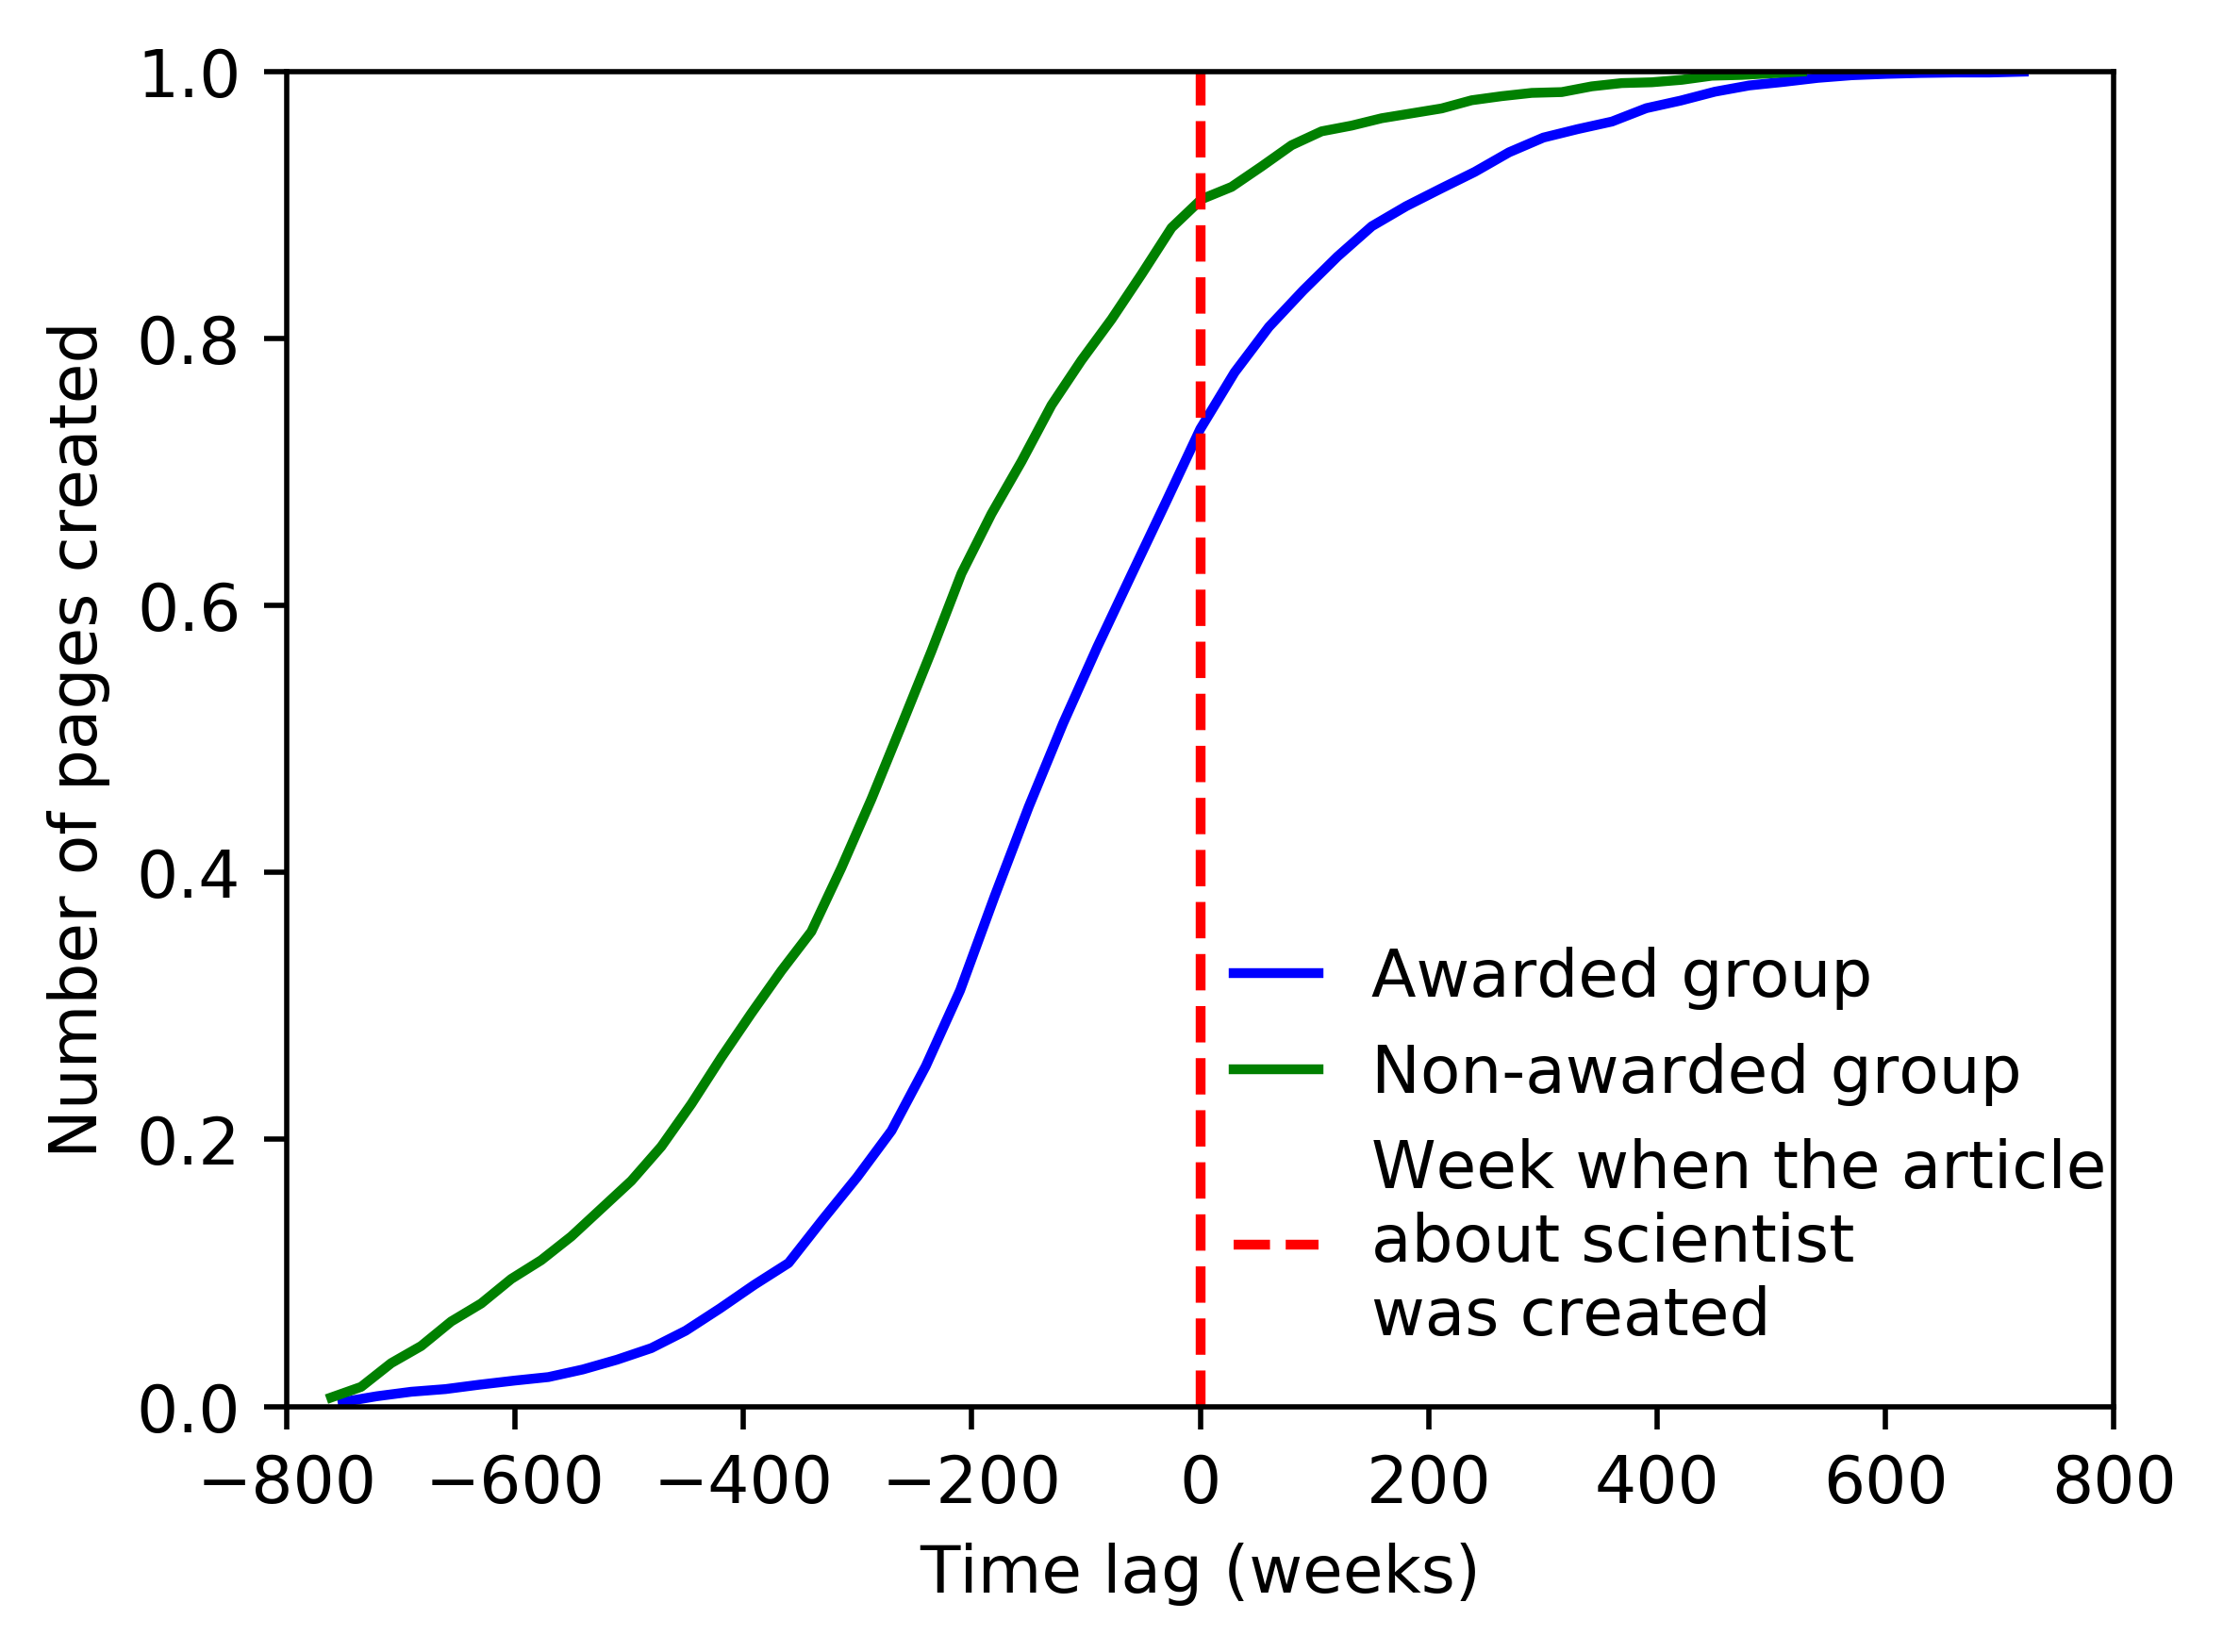

In [4]:
plot_distribution(seed, baseline, '/timelag_weekly_normed.png',period="weeks")

In [ ]:
#main_dict_seed

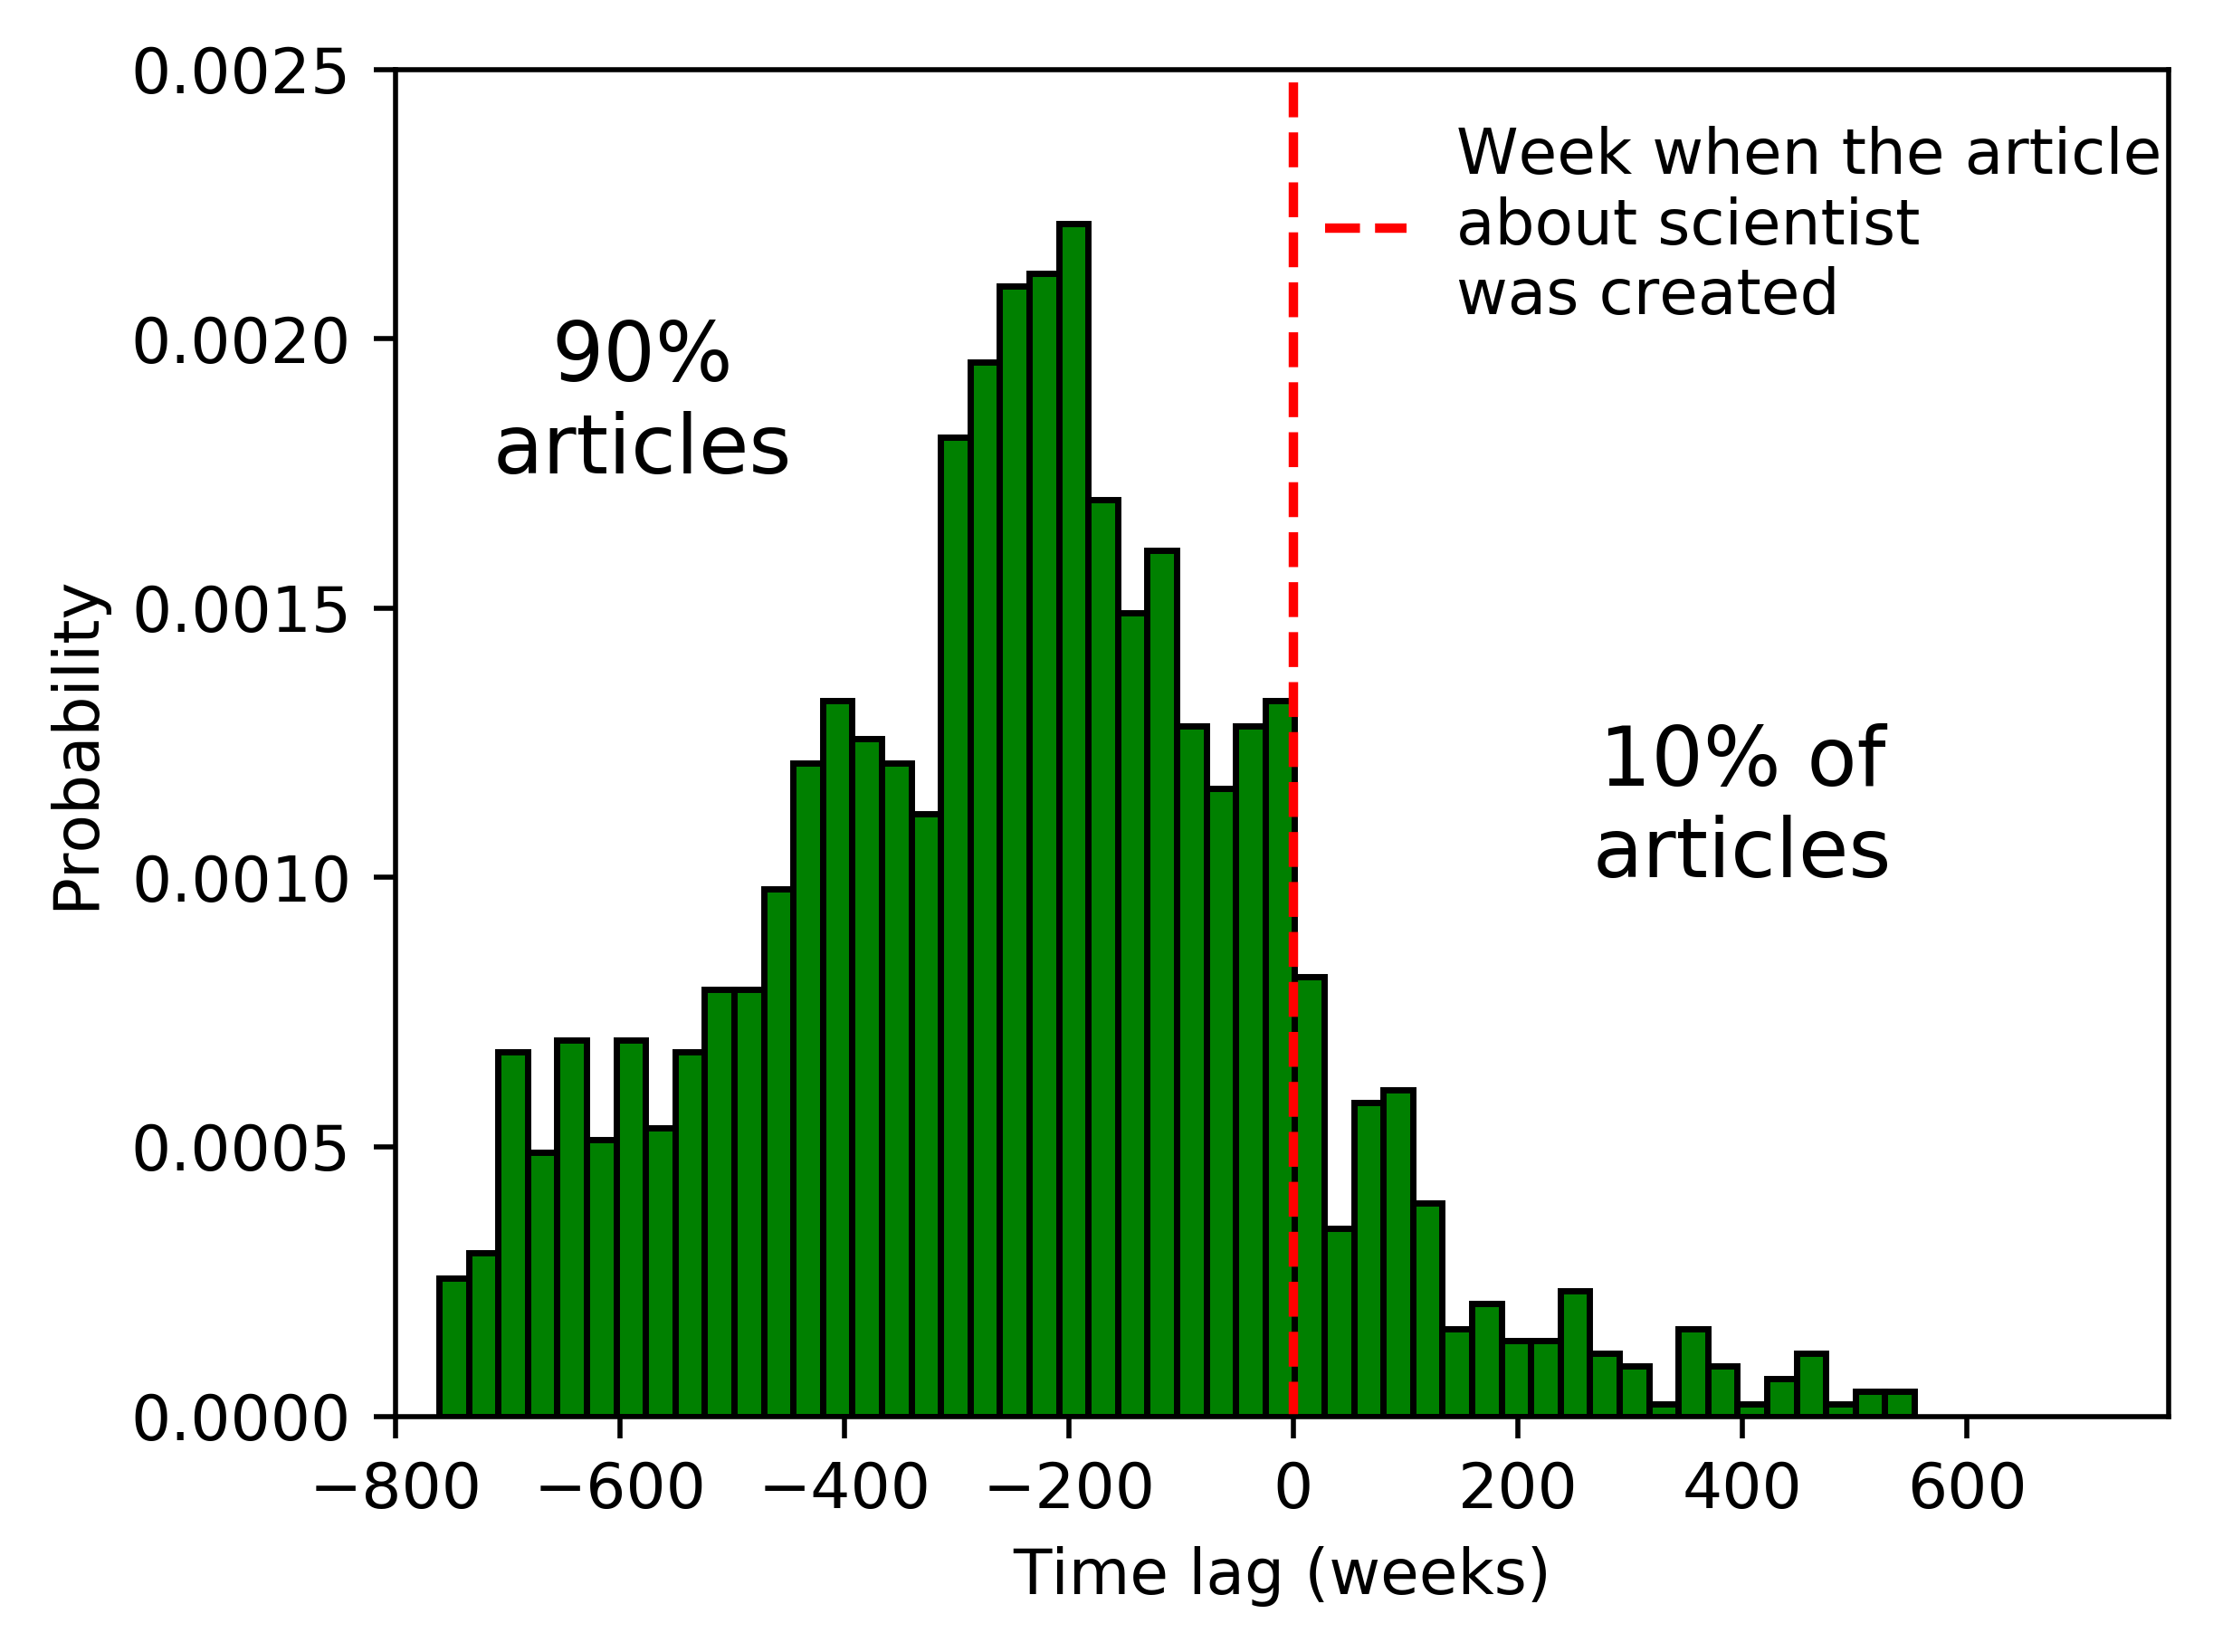

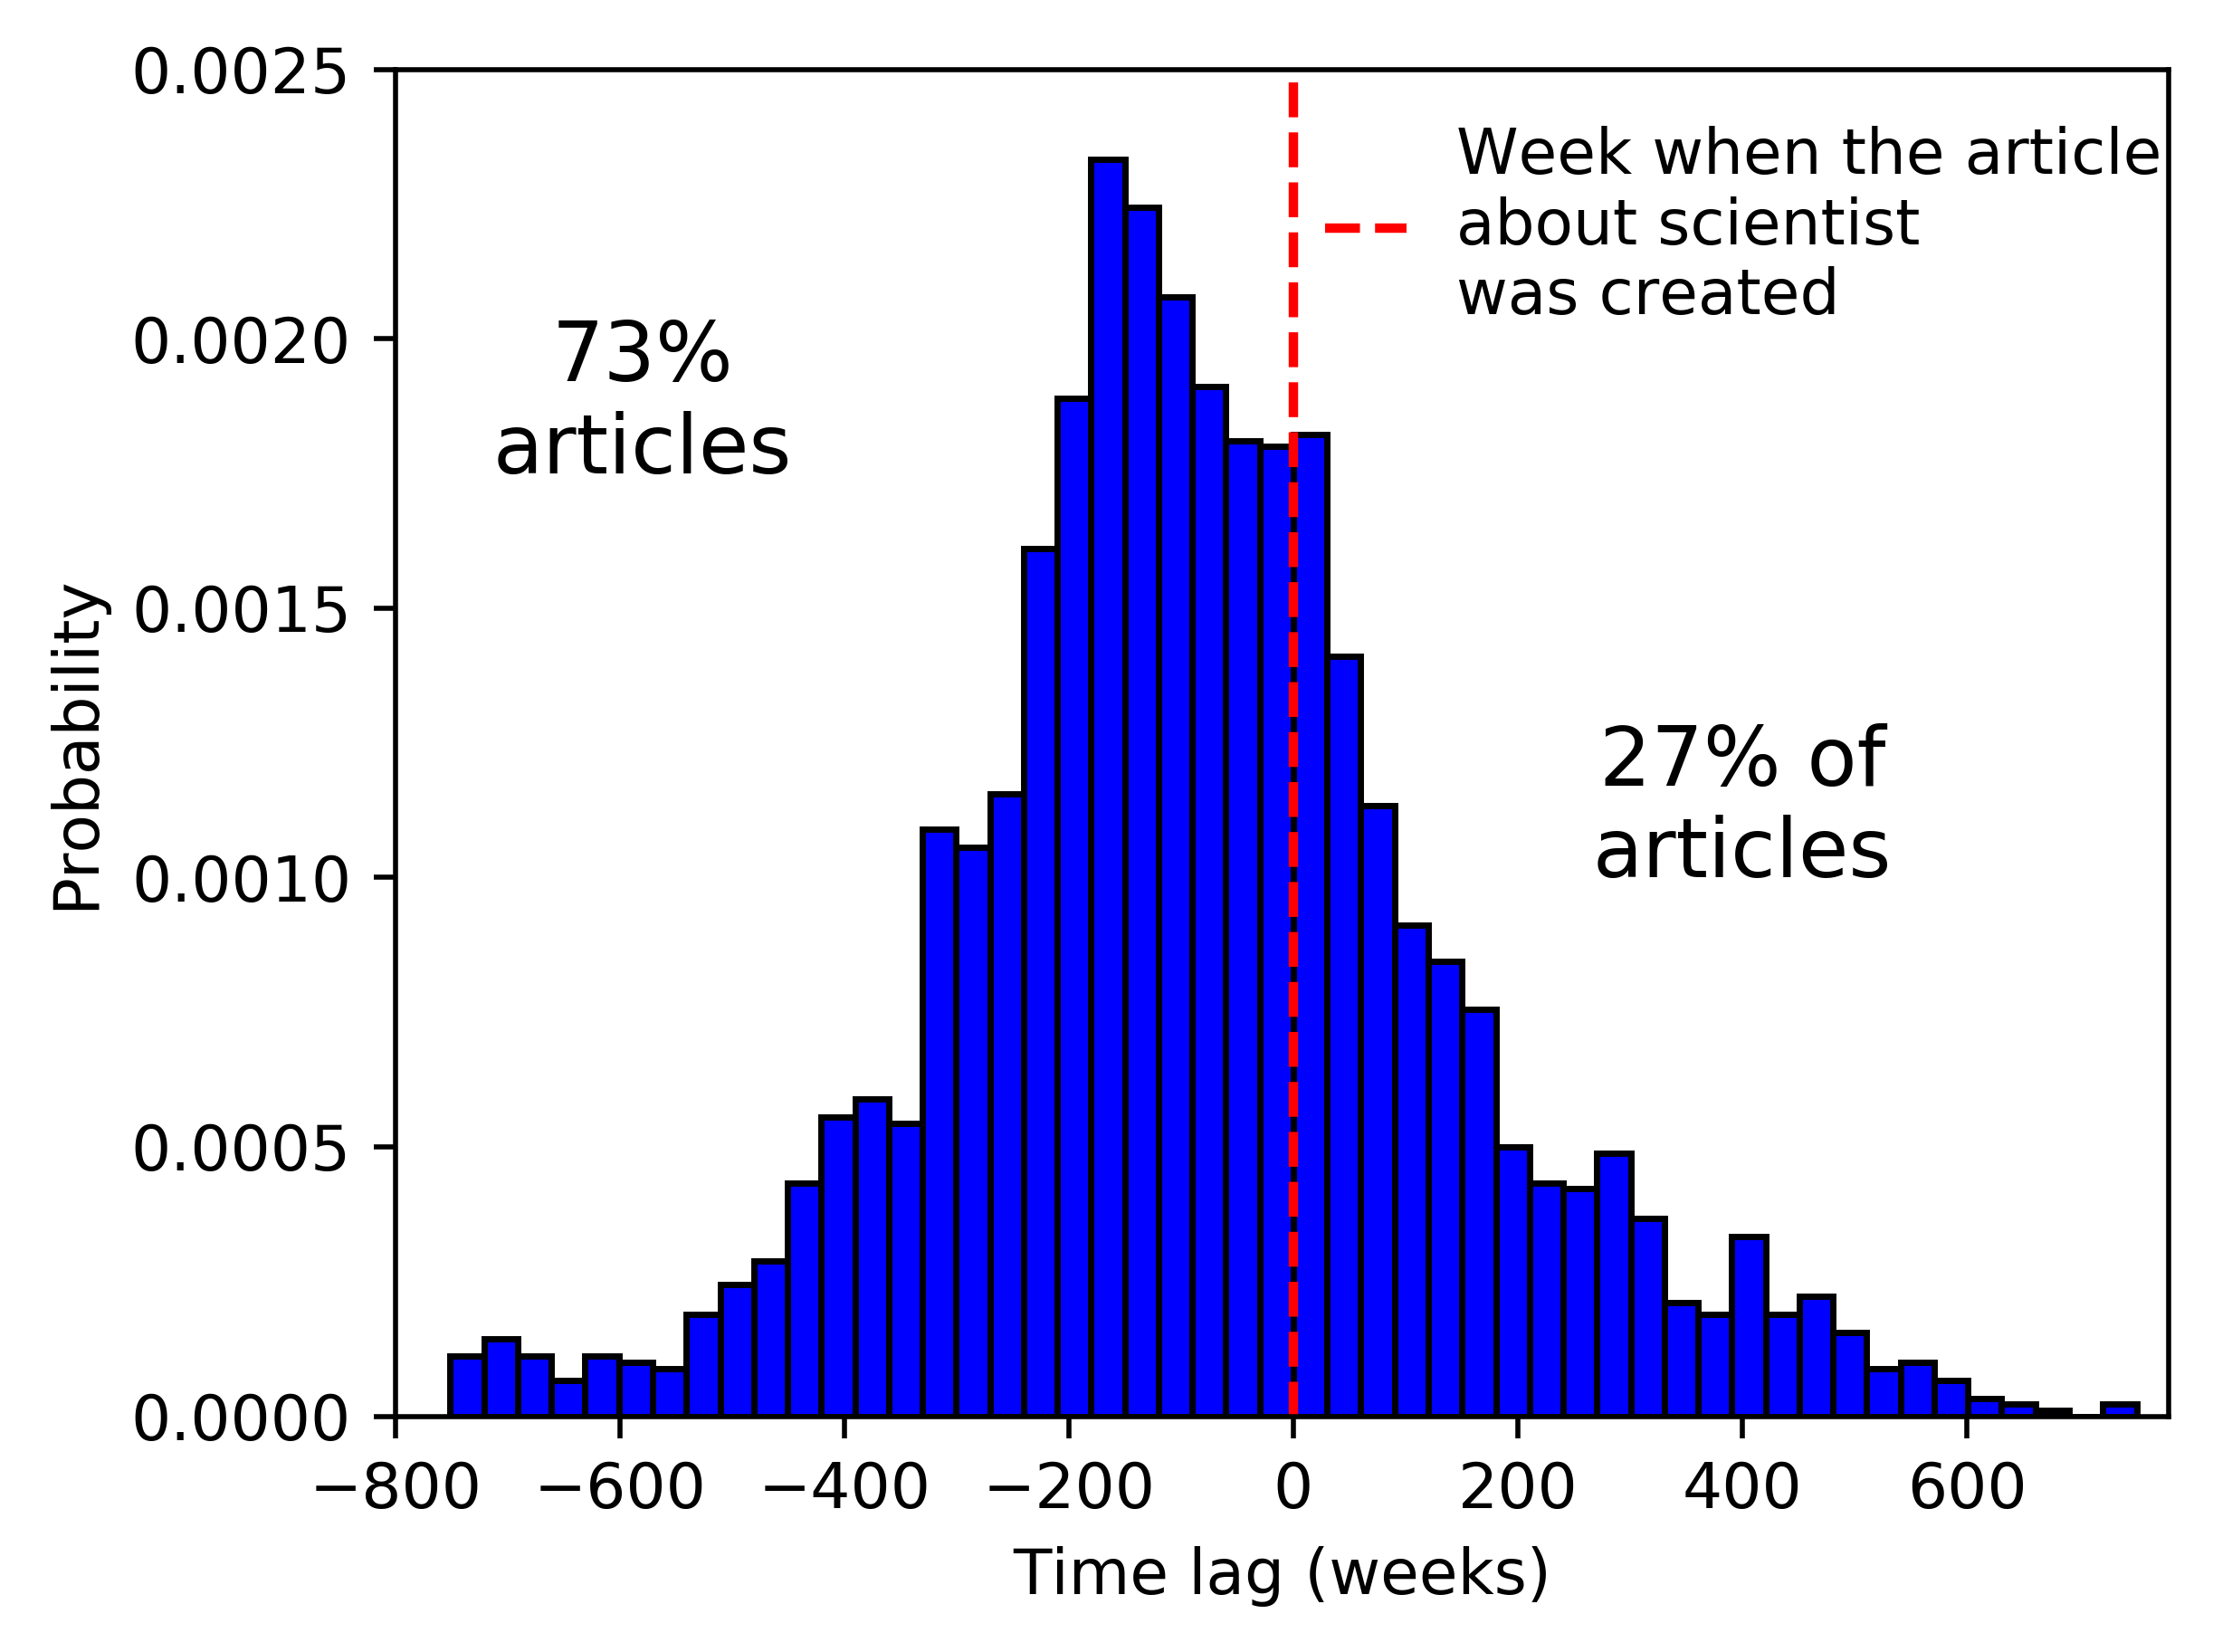

In [5]:
plotting(baseline, '/timelag_weekly_(baseline_creation_date).png',color="green",period="weeks")
plt.show()
plotting(seed, '/timelag_weekly_(seed_creation_date).png',period="weeks",text1="73",text2="27")

In [135]:
#calculate difference
from scipy.stats import ks_2samp, mannwhitneyu

print ks_2samp(seed, baseline)
print mannwhitneyu(seed, baseline)

Ks_2sampResult(statistic=0.31678183689704253, pvalue=2.9910676234349582e-93)
MannwhitneyuResult(statistic=1455297.5, pvalue=1.9205382241715344e-115)


In [136]:
#cliffs distance

def Atest_delta_cliffs(dist1, dist2):
    equal = 0.0
    greater = 0.0
    smaller=0.0
    for x in dist1:
        for y in dist2:
            if x == y  : equal += 1
            elif x > y  : greater += 1
            else : smaller+=1
    nm = len(dist1) * len(dist2)
    vda=(greater / nm) + ((0.5 * equal) / nm)
    print 2.*vda - 1
    delta=(greater - smaller) / nm
    return delta

In [154]:
print len(seed),len(baseline)

2996 1633


In [137]:
Atest_delta_cliffs(seed, baseline)

0.405086553453


0.4050865534531856

[  10   23   33   39   49   58   66   83  105  131  170  220  273  322  420
  515  619  764  934 1144 1346 1533 1705 1868 2030 2189 2318 2422 2501 2579
 2647 2692 2733 2770 2814 2846 2865 2884 2913 2931 2951 2965 2973 2980 2988
 2991 2993 2994 2994 2996]
[ 0.00333778  0.0076769   0.01101469  0.01301736  0.01635514  0.01935915
  0.02202937  0.02770361  0.03504673  0.04372497  0.05674232  0.07343124
  0.09112149  0.10747664  0.14018692  0.17189586  0.20660882  0.25500667
  0.31174901  0.38184246  0.44926569  0.51168227  0.56909209  0.62349802
  0.6775701   0.73064083  0.77369827  0.80841124  0.83477968  0.86081439
  0.88351136  0.89853138  0.91221631  0.92456609  0.93925232  0.94993323
  0.95627505  0.9626168   0.97229642  0.97830439  0.98497999  0.98965287
  0.9923231   0.99465954  0.99732977  0.99833113  0.99899864  0.99933243
  0.99933243  1.        ]


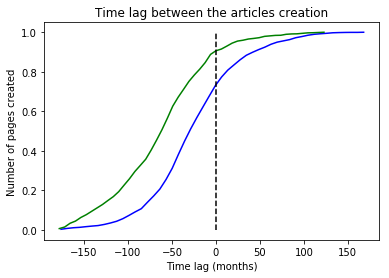

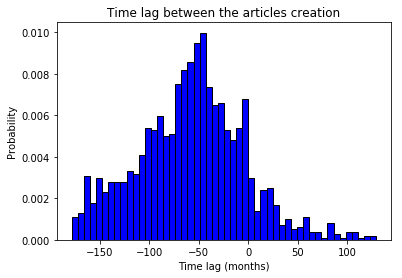

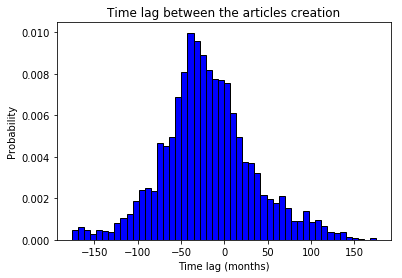

In [30]:
seed = monthly_aggregation(seed)
baseline = monthly_aggregation(baseline)
plot_distribution(seed, baseline, '/timelag_monthly_normed.jpg')
plt.show()
plotting(baseline, '/timelag_monthly_(baseline_creation_date).pdf')
plt.show()
plotting(seed, '/timelag_monthly_(seed_creation_date).pdf')